In [70]:
from PIL import Image, ImageDraw
import numpy as np

def make_square(image_path, color=(255, 255, 255)):
    img = Image.open(image_path)
    width, height = img.size

    # Determine the size of the new square image
    new_size = max(width, height)

    # Create a new blank image with the square size and desired color
    new_img = Image.new("RGB", (new_size, new_size), color)

    # Paste the original image onto the center of the new image
    new_img.paste(img, ((new_size - width) // 2, (new_size - height) // 2))

    return new_img

# Example usage
image_path = "/Users/johncao/Documents/Programming/Stanford/CS224G/illustration/illustration2.png"
square_image = make_square(image_path)

# Create a blank mask (same size as the original image)
mask = Image.new("L", square_image.size, 0)  # 'L' mode for grayscale

w = 30
h = 30
x = 100
y = 150
# Define the area to edit (example: white circle in the center)
draw = ImageDraw.Draw(mask)
draw.ellipse(xy=(x, y, x+w, y+h), fill=255)  # Example coordinates

# Save the mask
mask.save("mask.png")
square_image.save("square_image.png")


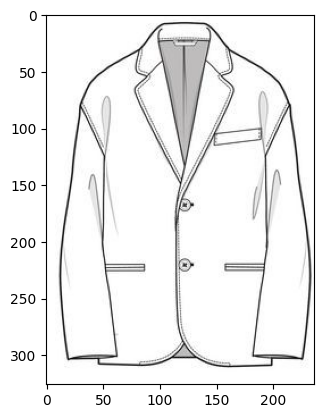

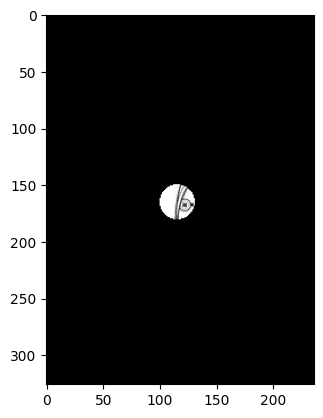

In [65]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/Users/johncao/Documents/Programming/Stanford/CS224G/illustration/illustration2.png')  # Load image
mask = cv2.imread('/Users/johncao/Documents/Programming/Stanford/CS224G/src/mask.png')  # Load image
image_array = np.array(image)  # Convert to NumPy array
mask_array = np.array(mask)/255  # Convert to NumPy array

fig = plt.figure()
plt.imshow(image_array)
plt.show()

image_array[:,:,0] = image_array[:,:,0]*mask_array[:,:,0]
image_array[:,:,1] = image_array[:,:,1]*mask_array[:,:,0]
image_array[:,:,2] = image_array[:,:,2]*mask_array[:,:,0]

fig = plt.figure()
plt.imshow(image_array)
plt.show()

In [95]:
from PIL import Image
import numpy as np

def create_transparent_mask(width, height, mask_area=None):
    """
    Create a transparent PNG mask for use with OpenAI's image editing API.
    
    Args:
        width (int): Width of the mask
        height (int): Height of the mask
        mask_area (tuple): Optional tuple of (x1, y1, x2, y2) defining the transparent area
                         If None, creates a fully transparent mask
    
    Returns:
        PIL.Image: RGBA image with transparent areas where edits should be applied
    """
    # Create a white background (fully opaque)
    mask = Image.new('RGBA', (width, height), (255, 255, 255, 255))
    
    if mask_area:
        # Convert to numpy array for easier manipulation
        mask_array = np.array(mask)
        
        # Set the alpha channel to 0 (fully transparent) in the specified area
        x1, y1, x2, y2 = mask_area
        mask_array[y1:y2, x1:x2, 3] = 0
        
        # Convert back to PIL Image
        mask = Image.fromarray(mask_array)
    else:
        # Make the entire mask transparent
        mask.putalpha(0)
    
    return mask

def make_square(image_path, color=(255, 255, 255)):
    img = Image.open(image_path)
    width, height = img.size

    # Determine the size of the new square image
    new_size = max(width, height)

    # Create a new blank image with the square size and desired color
    new_img = Image.new("RGB", (new_size, new_size), color)

    # Paste the original image onto the center of the new image
    new_img.paste(img, ((new_size - width) // 2, (new_size - height) // 2))

    new_img.save("square_image.png")

    return new_img


image_path = "/Users/johncao/Documents/Programming/Stanford/CS224G/reference/reference1.png"
square_image = make_square(image_path)

# Create a 512x512 mask with a transparent rectangle in the middle
x = 500
y = 500
w = 200
h = 200
mask = create_transparent_mask(
    square_image.size[0], 
    square_image.size[0], 
    mask_area=(x, y, x+w, y+h)  # Creates a 200x200 transparent area in the center
)

# Save the mask
mask.save("transparent_mask.png")


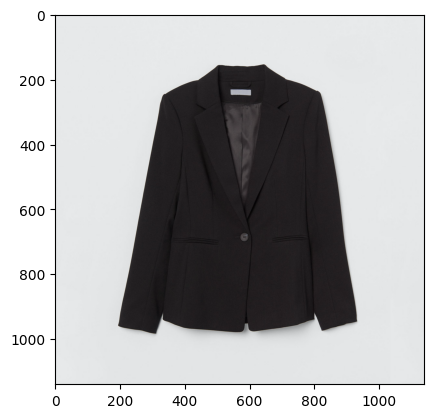

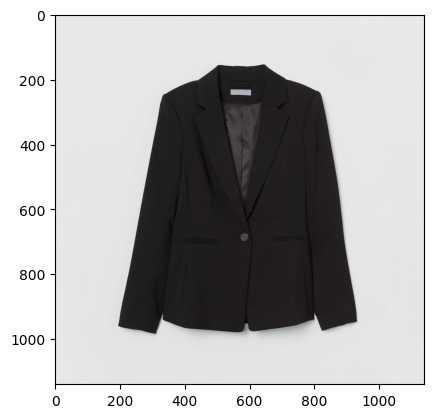

In [96]:
image = cv2.imread('/Users/johncao/Documents/Programming/Stanford/CS224G/src/square_image.png')  # Load image
mask = cv2.imread('/Users/johncao/Documents/Programming/Stanford/CS224G/src/transparent_mask.png')  # Load image

image_array = np.array(image)  # Convert to NumPy array
mask_array = np.array(mask)  # Convert to NumPy array

fig = plt.figure()
plt.imshow(image_array)
plt.show()

fig = plt.figure()
plt.imshow(image_array + mask_array)
plt.show()

In [91]:
from PIL import Image

def overlay_images(background_path, overlay_path, output_path, position=(0, 0), transparency=128):
    # Open the background and overlay images
    background = Image.open(background_path)
    overlay = Image.open(overlay_path)

    # Ensure both images are in RGBA mode (with transparency)
    background = background.convert("RGBA")
    overlay = overlay.convert("RGBA")

    # Resize overlay if needed (optional)
    overlay = overlay.resize(background.size)

    # Apply transparency to the overlay image
    overlay = Image.blend(background, overlay, alpha=transparency/255)

    # Save the final image
    overlay.save(output_path)

image = "/Users/johncao/Documents/Programming/Stanford/CS224G/src/square_image.png"
mask = "/Users/johncao/Documents/Programming/Stanford/CS224G/src/transparent_mask.png"
overlay_images(image, mask, "output_image.png", transparency=128)


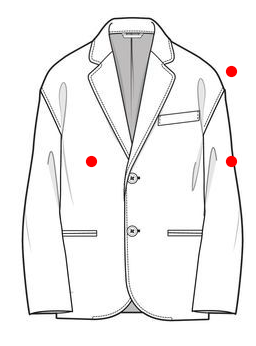

In [21]:
import matplotlib.pyplot as plt

image = cv2.imread('/Users/johncao/Documents/Programming/Stanford/CS224G/illustration/illustration2.png')  # Load image

image_array = np.array(image)  # Convert to NumPy array
coords = [(220,60), (80,150) , (220,150)]

height, width, c = image_array.shape  # Image shape (H, W)
dpi = 100  # Set DPI for figure resolution

# Set figure size based on image size
plt.figure(figsize=(width / dpi, height / dpi), dpi=dpi)

# Plot the image
plt.imshow(image, cmap='gray')
for coord in coords:
    plt.scatter(coord[0], coord[1], color='red', s=50)

# Save the figure with the exact image size
plt.axis('off')  # Remove axes
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Remove padding
#plt.savefig("output.png", dpi=dpi, bbox_inches='tight', pad_inches=0)

plt.show()

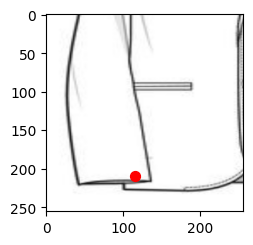

In [46]:
image = cv2.imread('/Users/johncao/Documents/Programming/Stanford/CS224G/patches/patch_2.png')  # Load image
# image =cv2.resize(image, (512,512))
image_array = np.array(image)  # Convert to NumPy array
coords = [(115, 210)]

height, width, c = image_array.shape  # Image shape (H, W)
dpi = 100  # Set DPI for figure resolution

# Set figure size based on image size
plt.figure(figsize=(width / dpi, height / dpi), dpi=dpi)

# Plot the image
plt.imshow(image, cmap='gray')

for coord in coords:
    plt.scatter(coord[0], coord[1], color='red', s=50)

# Save the figure with the exact image size
# plt.axis('off')  # Remove axes
# plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Remove padding
# plt.savefig("output.png", dpi=dpi, bbox_inches='tight', pad_inches=0)

plt.show()

In [36]:
import os
import cv2
import numpy as np

def split_image(image_path, output_dir, patch_size):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Could not open or find the image.")

    # Get image dimensions
    height, width, _ = image.shape

    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Split the image into patches
    patch_id = 0
    for y in range(0, height, patch_size):
        for x in range(0, width, patch_size):
            # Extract patch (handle edges by ensuring it doesn't go out of bounds)
            patch = image[y:y+patch_size, x:x+patch_size]

            # Save patch
            patch_filename = os.path.join(output_dir, f"patch_{patch_id}.png")
            cv2.imwrite(patch_filename, patch)
            patch_id += 1

    print(f"Saved {patch_id} patches in '{output_dir}'")

# Example usage
image_path = "/Users/johncao/Documents/Programming/Stanford/CS224G/src/output.png"  # Change this to your image path
output_dir = "/Users/johncao/Documents/Programming/Stanford/CS224G/patches"
patch_size = 256  # Size of square patches in pixels

split_image(image_path, output_dir, patch_size)


Saved 4 patches in '/Users/johncao/Documents/Programming/Stanford/CS224G/patches'


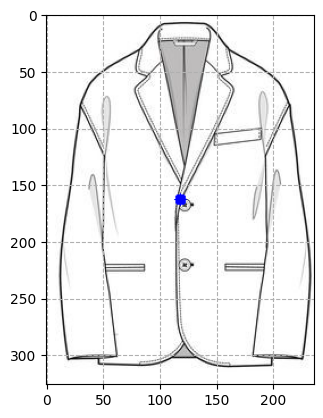

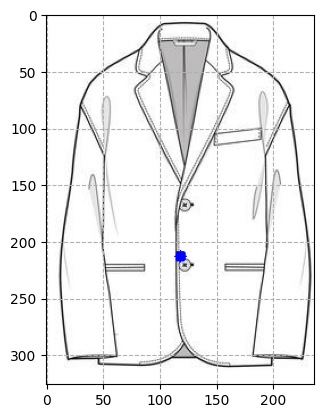

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def draw_dot(image, x=None, y=None, color=(0, 0, 255), radius=5):
    """
    Draws a dot on the image. The dot is initialized at the center if no coordinates are given.
    
    Parameters:
        image (numpy.ndarray): The input image.
        x (int, optional): The x-coordinate of the dot. Defaults to center.
        y (int, optional): The y-coordinate of the dot. Defaults to center.
        color (tuple): The color of the dot in (B, G, R) format. Default is red.
        radius (int): Radius of the dot. Default is 5.
    
    Returns:
        numpy.ndarray: Image with the dot drawn.
    """
    height, width, _ = image.shape
    if x is None:
        x = width // 2
    if y is None:
        y = height // 2
    
    image_with_dot = image.copy()
    cv2.circle(image_with_dot, (x, y), radius, color, -1)
    return image_with_dot

# Example usage:

# Load an image
image = cv2.imread('/Users/johncao/Documents/Programming/Stanford/CS224G/illustration/illustration2.png')  # Load image
image = np.array(image)  # Convert to NumPy array
H, W, C = image.shape   # Image shape

# Initialize the dot at the center of the image
x = W//2
y = H//2

# Draw initial dot
initial_image = draw_dot(image, x=x, y=y)

fig = plt.figure()
plt.imshow(initial_image)
plt.grid(True)  # Enables the grid
plt.grid(linestyle='--')
plt.savefig('init.png')
plt.show()

# Move the dot
delta_x = 0  # Move slightly left
delta_y = 50  # Move upward

updated_image = draw_dot(image, x=x+delta_x, y=y+delta_y)

fig = plt.figure()
plt.imshow(updated_image)
plt.grid(True)  # Enables the grid
plt.grid(linestyle='--')
plt.savefig('move.png')
plt.show()


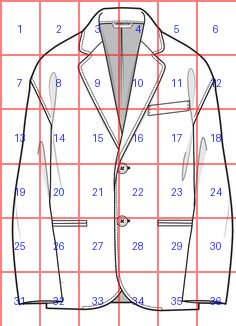

In [9]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np

def overlay_numbered_grid(image_path, output_path, grid_rows=5, grid_cols=5, 
                          line_color=(255, 0, 0, 128), text_color=(255, 0, 0, 200),
                          line_width=2, font_size=20):
    """
    Overlay a transparent numbered grid on an image.
    
    Parameters:
    -----------
    image_path : str
        Path to the input image
    output_path : str
        Path where the output image will be saved
    grid_rows : int
        Number of rows in the grid
    grid_cols : int
        Number of columns in the grid
    line_color : tuple
        RGBA color for grid lines (R, G, B, A), where A is alpha/transparency (0-255)
    text_color : tuple
        RGBA color for number text (R, G, B, A)
    line_width : int
        Width of grid lines in pixels
    font_size : int
        Font size for the numbers
        
    Returns:
    --------
    None, but saves the modified image to output_path
    """
    # Open the image
    img = Image.open(image_path).convert("RGBA")
    width, height = img.size
    
    # Create a transparent overlay for the grid
    overlay = Image.new("RGBA", img.size, (0, 0, 0, 0))
    draw = ImageDraw.Draw(overlay)
    
    # Calculate grid cell dimensions
    cell_width = width / grid_cols
    cell_height = height / grid_rows
    
    # Draw vertical lines
    for i in range(grid_cols + 1):
        x = i * cell_width
        draw.line([(x, 0), (x, height)], fill=line_color, width=line_width)
    
    # Draw horizontal lines
    for i in range(grid_rows + 1):
        y = i * cell_height
        draw.line([(0, y), (width, y)], fill=line_color, width=line_width)
    
    # Try to load a font, fall back to default if not available
    try:
        font = ImageFont.truetype("arial.ttf", font_size)
    except IOError:
        font = ImageFont.load_default()
    
    # Add numbers to each cell
    counter = 1
    for row in range(grid_rows):
        for col in range(grid_cols):
            # Calculate text position (center of the cell)
            x = col * cell_width + cell_width / 2
            y = row * cell_height + cell_height / 2
            
            # Get text size to center it properly (using newer method)
            text = str(counter)
            # For newer Pillow versions
            try:
                left, top, right, bottom = font.getbbox(text)
                text_width = right - left
                text_height = bottom - top
            except AttributeError:
                # Fallback for even newer Pillow versions
                text_width, text_height = font.getsize(text)
            
            # Draw the text
            draw.text((x - text_width/2, y - text_height/2), text, fill=text_color, font=font)
            counter += 1
    
    # Composite the original image with the overlay
    result = Image.alpha_composite(img, overlay)
    
    # If the output format doesn't support alpha (like JPEG), convert to RGB
    if output_path.lower().endswith(('.jpg', '.jpeg')):
        result = result.convert("RGB")
    
    # Save the result
    result.save(output_path)
    
    return result
img_path = "/Users/johncao/Documents/Programming/Stanford/CS224G/finetune/utils/test_imgs/blazer_illustration_front.png"
# Example usage
overlay_numbered_grid(
    image_path=img_path,
    output_path="grid_output.png",
    grid_rows=6,
    grid_cols=6,
    line_color=(255, 0, 0, 128),  # Semi-transparent red lines
    text_color=(0, 0, 255, 200)    # Semi-transparent blue text
)

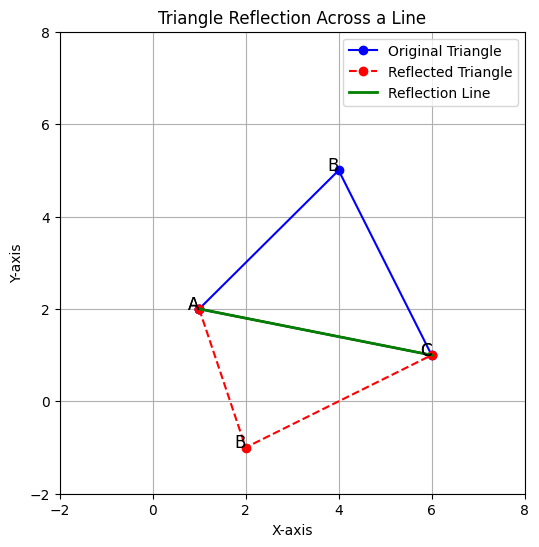

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def reflect_point_across_line(P, A, B):
    """
    Reflects point P across the line formed by points A and B.
    
    P, A, B are NumPy arrays of shape (2,) representing (x, y) coordinates.
    """
    x0, y0 = P
    x1, y1 = A
    x2, y2 = B
    
    # Compute line coefficients: ax + by + c = 0
    a = y2 - y1
    b = x1 - x2
    c = x2 * y1 - x1 * y2

    # Compute the reflected point
    d = (a * x0 + b * y0 + c) / (a**2 + b**2)
    x_reflected = x0 - 2 * a * d
    y_reflected = y0 - 2 * b * d
    
    return np.array([x_reflected, y_reflected])

# Define the 3 points of the triangle
triangle = np.array([
    [1, 2],   # Point A
    [4, 5],   # Point B
    [6, 1]    # Point C (vertex to reflect)
])

# Select the vertex to reflect (e.g., C)
vertex_to_reflect = triangle[1]  # Point C
line_points = np.vstack([triangle[0], triangle[2]])  # Points A and B

# Compute reflection
reflected_vertex = reflect_point_across_line(vertex_to_reflect, line_points[0], line_points[1])

# Create the new reflected triangle
reflected_triangle = triangle.copy()
reflected_triangle[1] = reflected_vertex  # Replace vertex C with its reflection

# Plot the original and reflected triangles
fig, ax = plt.subplots(figsize=(6, 6))

def plot_triangle(points, color, label, linestyle='-'):
    x = np.append(points[:, 0], points[0, 0])  # Close the triangle
    y = np.append(points[:, 1], points[0, 1])
    ax.plot(x, y, color=color, marker='o', linestyle=linestyle, label=label)
    for i, txt in enumerate(["A", "B", "C"]):
        ax.text(points[i, 0], points[i, 1], txt, fontsize=12, ha='right')

# Plot original triangle
plot_triangle(triangle, 'b', 'Original Triangle')

# Plot reflected triangle
plot_triangle(reflected_triangle, 'r', 'Reflected Triangle', linestyle='--')

# Plot reflection line (AB)
ax.plot(line_points[:, 0], line_points[:, 1], 'g-', linewidth=2, label="Reflection Line")

# Formatting
ax.set_xlim(-2, 8)
ax.set_ylim(-2, 8)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Triangle Reflection Across a Line')
ax.legend()
ax.grid(True)

plt.show()


In [4]:
from pydantic import BaseModel
from openai import OpenAI

client = OpenAI()

class CalendarEvent(BaseModel):
    name: str
    date: str
    participants: list[str]

completion = client.beta.chat.completions.parse(
    model="gpt-4o-2024-08-06",
    messages=[
        {"role": "system", "content": "Extract the event information."},
        {"role": "user", "content": "Alice and Bob and APA are going to a science fair on Friday."},
    ],
    response_format=CalendarEvent,
)

event = completion.choices[0].message.parsed

In [14]:
from PIL import Image

def convert_to_png(input_path, output_path=None):
    """
    Convert an image to PNG format.
    
    Args:
        input_path (str): Path to the source image
        output_path (str, optional): Path for the output PNG file.
            If not provided, uses the input filename with .png extension.
    
    Returns:
        str: Path to the saved PNG file
    """
    # If no output path is specified, create one from the input path
    if output_path is None:
        # Replace original extension with .png
        output_path = input_path.rsplit('.', 1)[0] + '.png'
    
    # Open the image
    try:
        img = Image.open(input_path)
        
        # Save as PNG
        img.save(output_path, 'PNG')
        print(f"Image successfully converted and saved to {output_path}")
        return output_path
    
    except Exception as e:
        print(f"Error converting image: {e}")
        return None
    
convert_to_png("/Users/johncao/Documents/Programming/Stanford/CS224G/finetune/utils/test_imgs/jacket.jpeg")

Image successfully converted and saved to /Users/johncao/Documents/Programming/Stanford/CS224G/finetune/utils/test_imgs/jacket.png


'/Users/johncao/Documents/Programming/Stanford/CS224G/finetune/utils/test_imgs/jacket.png'